In [49]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


transfersUnfiltered = pd.read_csv("transfers.csv", sep=";")
clubsInLeaguesDict = pd.read_csv("clubs_in_leagues.csv", sep=";")
clubsDict = pd.read_csv("dict_clubs.csv", sep=";")
countryDict = pd.read_csv("dict_countries.csv", sep=";")
leaguesDict = pd.read_csv("dict_leagues.csv", sep=";")

first6leagues = list(leaguesDict["country_id"])[:6]


# Filter transfersWithClubs
transfers = transfersUnfiltered[(transfersUnfiltered["is_loan"] == 0) &
                                (transfersUnfiltered["season"] > 2000) &
                                (transfersUnfiltered["fee"] > 0 | ~pd.isnull(transfersUnfiltered["fee"]))]

transfersWithClubs = pd.merge(transfers,clubsDict, left_on="from_club_id", right_on="id")
transfersWithClubs = transfersWithClubs[transfersWithClubs["country_id"].isin(first6leagues)]
transfersWithClubs

id_x  player_id              player_name  season        date  \
0           8          1        Jermaine Beckford    2011  2011-08-31   
1          20          3              Mark Davies    2008  2009-01-26   
2          43          5  Przemyslaw Kazimierczak    2007  2008-01-31   
3          53          6           Jaroslaw Fojut    2008  2009-02-11   
5          72          8             Ali Al-Habsi    2011  2011-07-01   
...       ...        ...                      ...     ...         ...   
14610  111397      11361                 Jorginho    2017  2017-07-01   
14617  111450      11367                   Aílton    2017  2017-07-18   
14620  111477      11369                  Césinha    2007  2007-07-01   
14621  111500      11371            Darel Russell    2007  2007-07-30   
14622  111501      11371            Darel Russell    2003  2003-07-01   

       from_club_id from_club_name  to_club_id     to_club_name  market_value  \
0               276        Everton         271        Leicester     4000000.0   
1               293         Wolves         289           Bolton      300000.0   
2               289         Bolton         419       Darlington      125000.0   
3               289         Bolton         426    Slask Wroclaw      200000.0   
5               289         Bolton         296            Wigan     2000000.0   
...             ...            ...         ...              ...           ...   
14610           375         Arouca          43    Saint-Étienne     1500000.0   
14617           367        Estoril           8    VfB Stuttgart      800000.0   
14620           351          Braga        2654  Rapid Bucharest      800000.0   
14621           299     Stoke City         295          Norwich      450000.0   
14622           295        Norwich         299       Stoke City           NaN   

       ...  is_end_of_loan is_future_transfer id_y        name  \
0      ...               0                  0  276     Everton   
1      ...               0                  0  293      Wolves   
2      ...               0                  0  289      Bolton   
3      ...               0                  0  289      Bolton   
5      ...               0                  0  289      Bolton   
...    ...             ...                ...  ...         ...   
14610  ...               0                  0  375      Arouca   
14617  ...               0                  0  367     Estoril   
14620  ...               0                  0  351       Braga   
14621  ...               0                  0  299  Stoke City   
14622  ...               0                  0  295     Norwich   

                      off_name country_id            city  \
0                   Everton FC        GBR       Liverpool   
1      Wolverhampton Wanderers        GBR             NaN   
2             Bolton Wanderers        GBR          Bolton   
3             Bolton Wanderers        GBR          Bolton   
5             Bolton Wanderers        GBR          Bolton   
...                        ...        ...             ...   
14610                FC Arouca        PRT          Arouca   
14617               GD Estoril        PRT         Estoril   
14620                 SC Braga        PRT           Braga   
14621               Stoke City        GBR  Stoke-on-Trent   
14622             Norwich City        GBR         Norwich   

                           stadium  stadium_id  is_first_team  
0                    Goodison Park       443.0              1  
1                              NaN         NaN              1  
2                   Macron Stadium       458.0              1  
3                   Macron Stadium       458.0              1  
5                   Macron Stadium       458.0              1  
...                            ...         ...            ...  
14610  Estádio Municipal de Arouca      1411.0              1  
14617      Estádio Antonio Coimbra      1388.0              1  
14620   Estádio Municipal de Braga      1413.0           

In [34]:
unique_vendas = len(transfersUnfiltered[transfersUnfiltered["is_loan"]==0])
unique_Loans =  len(transfersUnfiltered[transfersUnfiltered["is_loan"]==1])
print(f"Número de vendas :{unique_vendas}")
print(f"Número de Empréstimos :{unique_Loans}")


Número de vendas :94312
Número de Empréstimos :17290


In [50]:

TopClubSet = transfersWithClubs.groupby(["from_club_name", "country_id"])["fee"].sum()
TopClubSet = pd.DataFrame(TopClubSet)
TopClubSet = TopClubSet.sort_values(by="fee", ascending=False)
TopClubSet = TopClubSet.reset_index()
TopClubs =[]
TopClubSet

from_club_name country_id          fee
0           Monaco        FRA  987905000.0
1         FC Porto        PRT  971338000.0
2         Juventus        ITA  969330000.0
3        Liverpool        GBR  902705000.0
4          Chelsea        GBR  872070000.0
..             ...        ...          ...
242       Xerez CD        ESP     685000.0
243           SPAL        ITA     350000.0
244    Real Oviedo        ESP     330000.0
245   GFCO Ajaccio        FRA     300000.0
246       Penafiel        PRT     150000.0

[247 rows x 3 columns]

In [51]:
for country in TopClubSet["country_id"].unique():
     TopClubs += TopClubSet[TopClubSet["country_id"]==country].nlargest(10,"fee")["from_club_name"].to_list()



In [53]:
transfersWithClubs = transfersWithClubs[transfersWithClubs["from_club_name"].isin(TopClubs) & transfersWithClubs["to_club_name"].isin(TopClubs) ]
transfersWithClubs = transfersWithClubs[transfersWithClubs["from_club_name"].isin(TopClubs)  ]

transfersWithClubs['fee'] = transfersWithClubs['fee'].astype(float)


# Create edges as tuples with weight as an attribute
edges = [(row['from_club_name'], row['to_club_name'], row['fee']) for _, row in transfersWithClubs.iterrows()]



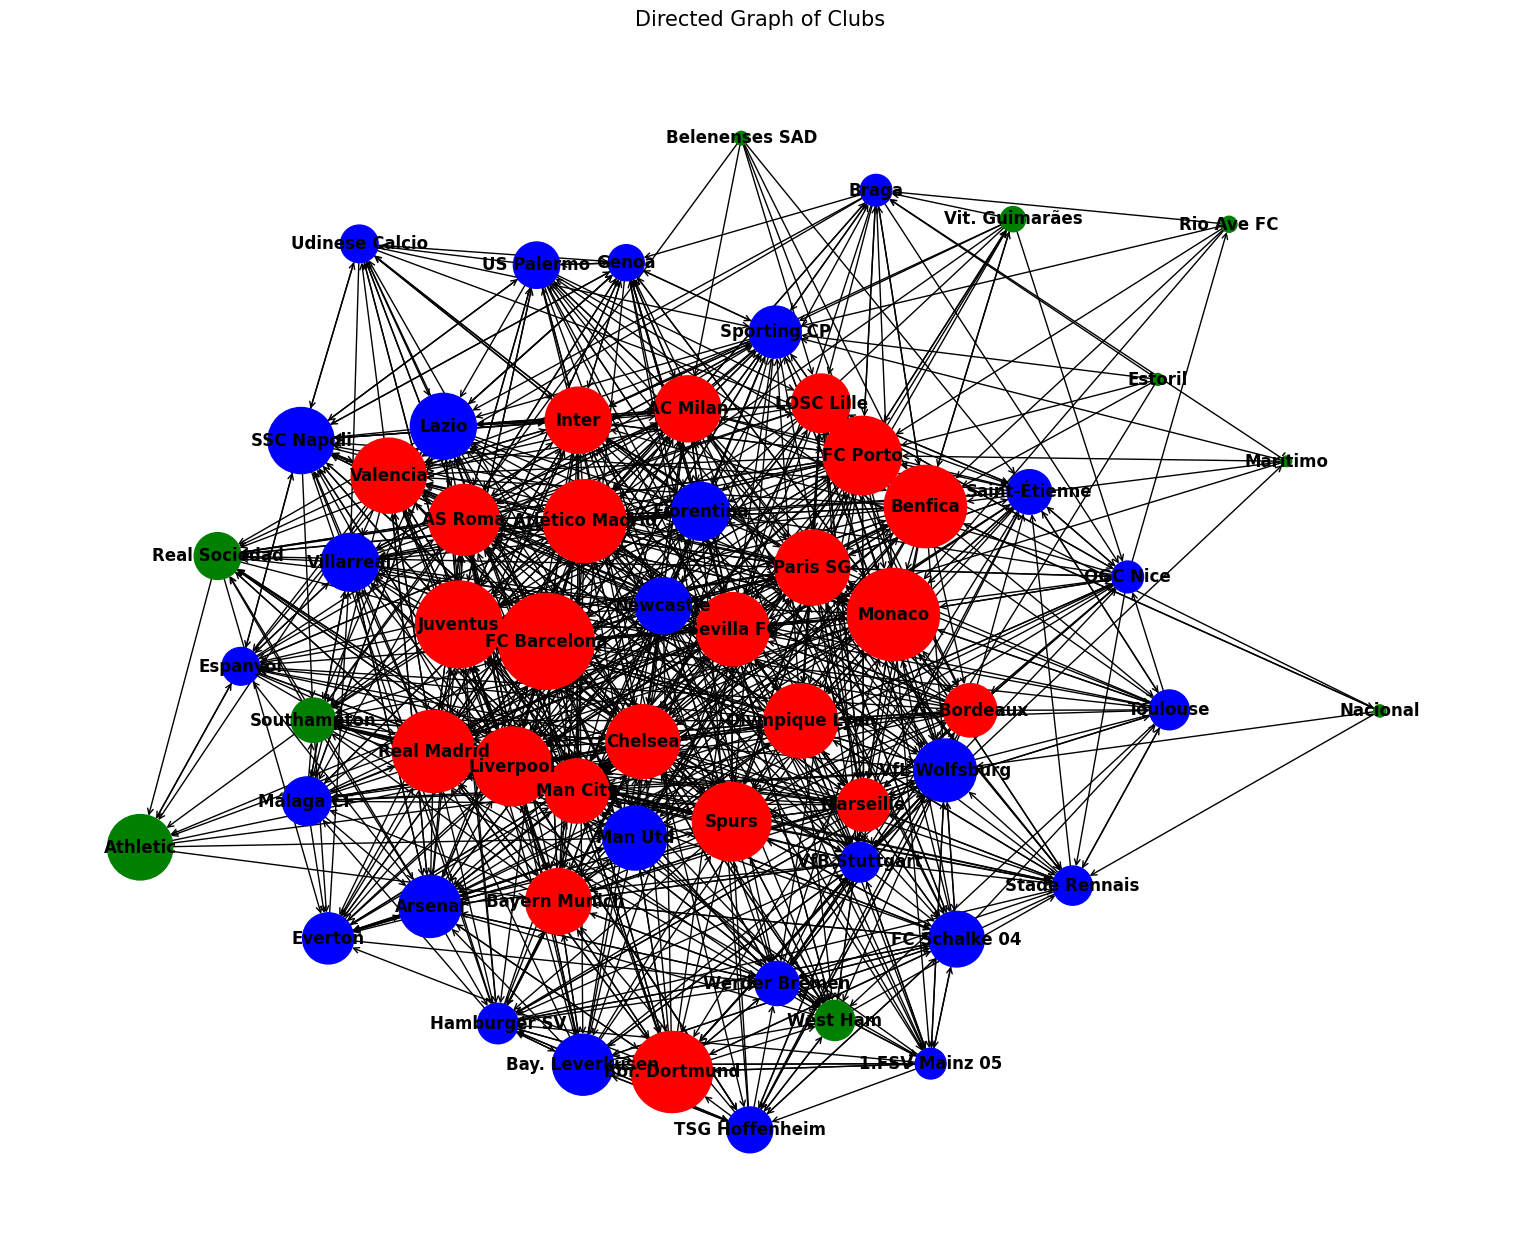

Is the network strongly connected? 
R:False
Diameter of the largest strongly connected component: 4


In [84]:

# Create directed graph
G = nx.DiGraph()
G.add_weighted_edges_from(edges)
node_weights = {node: 0 for node in G.nodes()}
#Agregar  valor de vendas por clubes
for u, v, data in G.edges(data=True):
    node_weights[u] += data['weight']/100000  

countries = TopClubSet["country_id"].unique()
colors = ["red", "blue", "green"]

degrees = dict(G.out_degree())


max_degree = max(degrees.values())
low_threshold = max_degree / 3
high_threshold = 2 * max_degree / 3


# Assign nodes to groups based on their degree
for node, degree in degrees.items():
    if degree <= low_threshold:
        G.nodes[node]['color'] = "green"  # Low degree
    elif degree <= high_threshold:
        G.nodes[node]['color'] =  "blue" # Medium degree
    else:
        G.nodes[node]['color'] = "red" # High degree


node_colors = [attrs['color'] for _, attrs in G.nodes(data=True)]
node_sizes = [(node_weights[node] ) for node in G.nodes()] 
# print(degrees)
# print(node_colors)
# print(node_sizes)
plt.figure(figsize=(15, 12))
layout = nx.kamada_kawai_layout(G, weight='fee')  
nx.draw(G, layout, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=12, font_weight='bold', arrowstyle='->', arrowsize=10)
plt.title('Directed Graph of Clubs', fontsize=15)
plt.show()
print(f"Is the network strongly connected? \nR:{nx.is_strongly_connected(G)}")

largest_scc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_scc)

# Calculate diameter of the largest SCC
diameter = nx.diameter(subgraph)
print(f"Diameter of the largest strongly connected component: {diameter}")


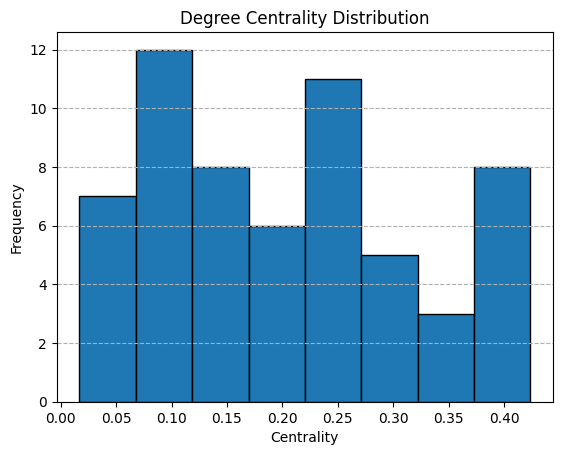

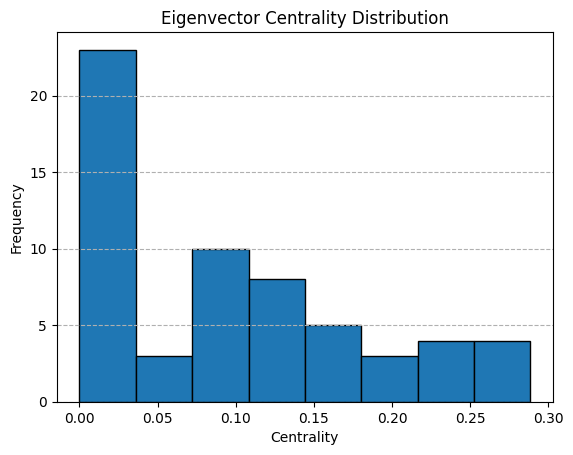

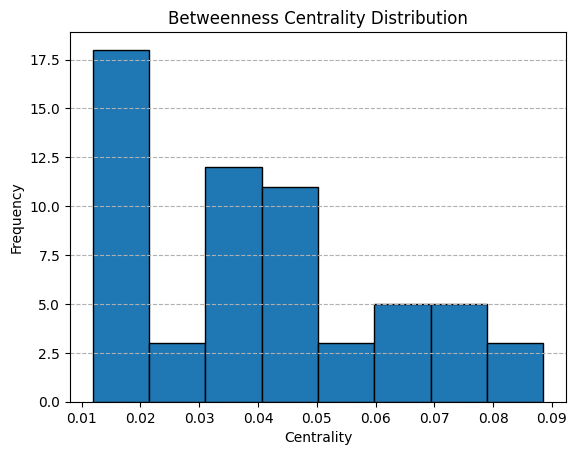

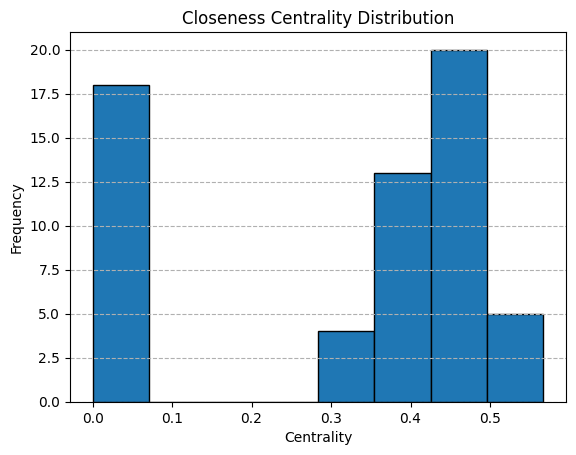

In [ ]:
# Calculate the centralities
import operator


degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=True)
closeness_centrality = nx.closeness_centrality(G)

# Function to plot the centrality distributions
def plot_centrality_distribution(centrality_dict, title):
    plt.figure()
    plt.hist(list(centrality_dict.values()), bins=8, edgecolor='black')
    plt.xlabel('Centrality')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', linestyle='--')
    plt.show()

# Plot each centrality distribution
plot_centrality_distribution(degree_centrality, "Degree Centrality Distribution")
plot_centrality_distribution(eigenvector_centrality, "Eigenvector Centrality Distribution")
plot_centrality_distribution(betweenness_centrality, "Betweenness Centrality Distribution")
plot_centrality_distribution(closeness_centrality, "Closeness Centrality Distribution")

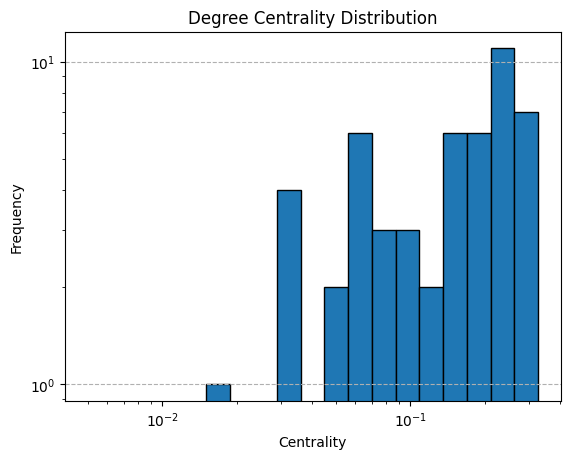

In [ ]:
# Function to plot the centrality distributions
def plot_centrality_distribution(centrality_dict, title):
    data = list(centrality_dict.values()) 
    plt.figure()
    start, stop = np.log10(min(data)), np.log10(max(data))
    bins = 20 ** np.linspace(start, stop, 20)
    plt.hist(data, log=True, bins=bins, edgecolor='black')
    plt.xscale('log')
    plt.xlabel('Centrality')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', linestyle='--')
    plt.show()

# Plot each centrality distribution
plot_centrality_distribution(degree_centrality, "Degree Centrality Distribution")